*PREDIKSI DIABETES*

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Load the dataset
# Replace 'your-dataset-file.csv' with the actual filename or path
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
data.copy()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# Converting gender column to numerical values
# Assuming the column name is 'gender', where 'Male' should be 1 and 'Female' should be 0
# Converting gender column to numerical values with handling missing values
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['gender'].fillna(-1, inplace=True)  # Fill missing values with -1
data['gender'] = data['gender'].astype(int)

In [9]:
# Example of encoding a categorical column to numerical values
data['smoking_history'] = data['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2})
data['smoking_history'].fillna(-1, inplace=True)  # Fill missing values with -1
data['smoking_history'] = data['smoking_history'].astype(int)

In [10]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [11]:
# Checking for missing values
missing_values = data.isnull().sum()

In [12]:
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


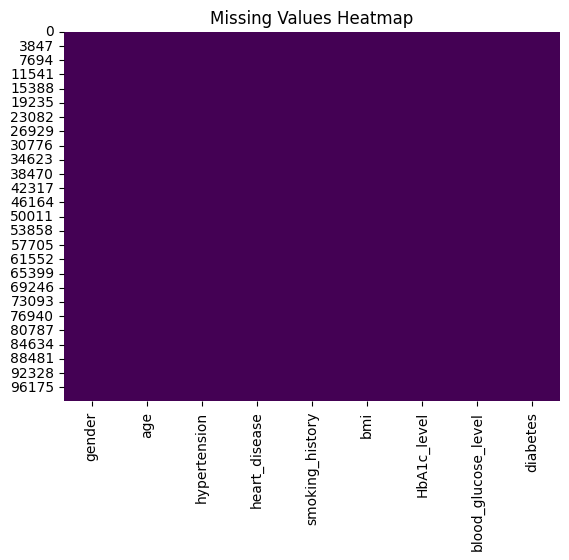

In [13]:
# Visualizing missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

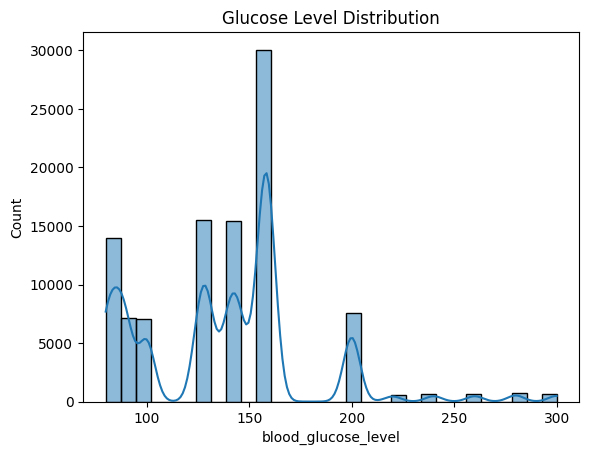

In [14]:
# Exploratory Data Analysis (EDA)
# Univariate analysis: Distribution of a numerical variable (e.g., glucose levels)
sns.histplot(data['blood_glucose_level'], kde=True, bins=30)
plt.title('Glucose Level Distribution')
plt.show()

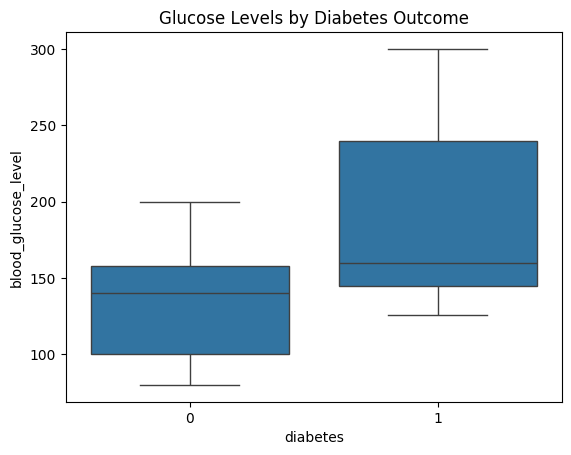

In [15]:
# Bivariate analysis: Relationship between glucose levels and diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Glucose Levels by Diabetes Outcome')
plt.show()

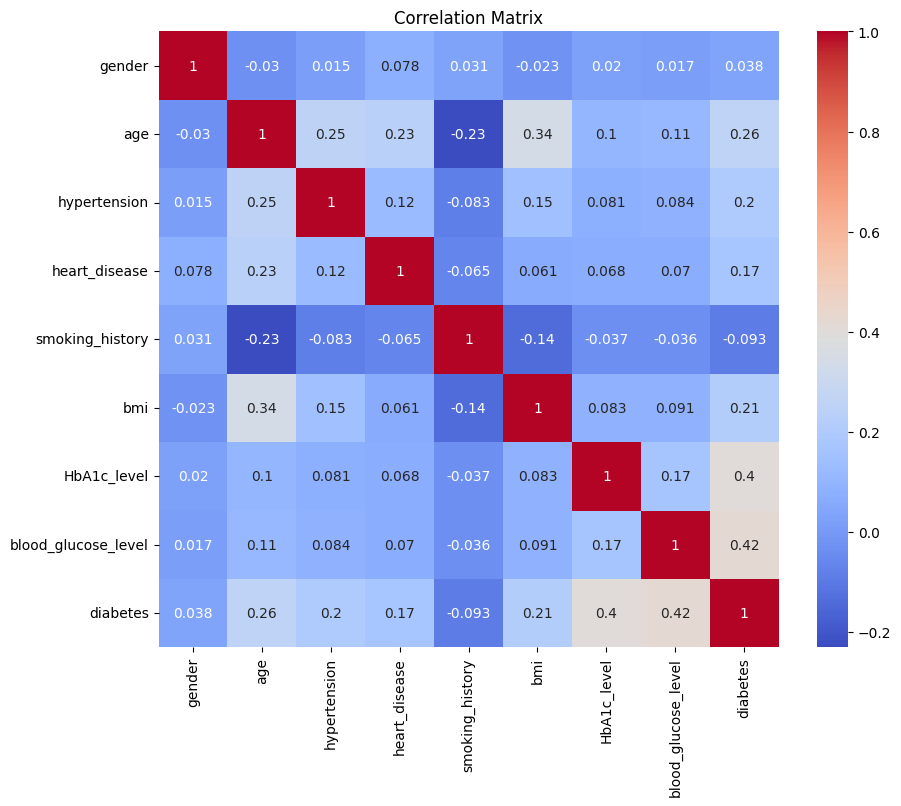

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Feature Engineering
# Example: Adding a new feature for glucose-to-BMI ratio (if applicable)
data['glucose_bmi_ratio'] = data['blood_glucose_level'] / (data['bmi'] + 1e-3)


In [18]:
# Splitting the dataset for Machine Learning
X = data.drop('diabetes', axis=1)  # Features (replace 'outcome' with your target column)
y = data['diabetes']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model Training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predictions and Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_prob_rf)


In [22]:
# Improving the Neural Network model

# Adding more layers and tuning hyperparameters
nn_model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the improved model with a lower learning rate
nn_model_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

c:\programmer\SUGIANTO_A\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Training the improved model
history_improved = nn_model_improved.fit(
    X_train, y_train, 
    epochs=100,  # Increase epochs for better learning
    batch_size=16,  # Reduce batch size for finer updates
    validation_data=(X_test, y_test),
    verbose=0  # Set to 1 if detailed logs are needed
)

In [24]:

# Predictions and Evaluation for Improved Neural Network
y_pred_nn_prob_improved = nn_model_improved.predict(X_test).flatten()
y_pred_nn_improved = (y_pred_nn_prob_improved > 0.5).astype(int)

nn_accuracy_improved = accuracy_score(y_test, y_pred_nn_improved)
nn_conf_matrix_improved = confusion_matrix(y_test, y_pred_nn_improved)
nn_roc_auc_improved = roc_auc_score(y_test, y_pred_nn_prob_improved)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


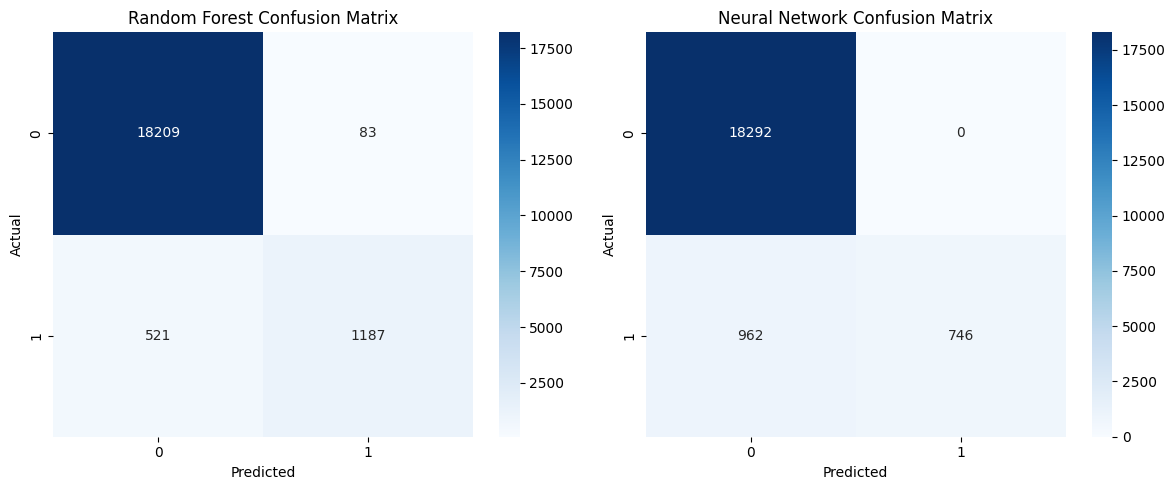

In [25]:
# Plotting Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(nn_conf_matrix_improved, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Neural Network Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

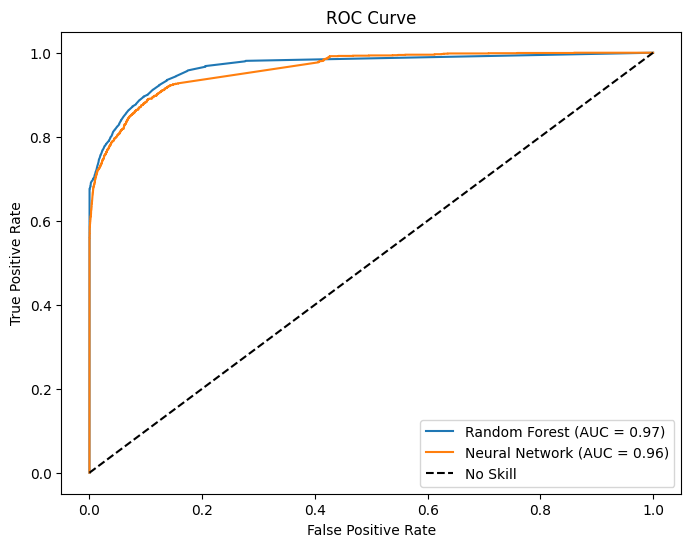

In [26]:
# Plotting ROC Curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_prob_rf)
nn_fpr, nn_tpr, _ = roc_curve(y_test, y_pred_nn_prob_improved)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_roc_auc_improved:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [28]:
# Printing Comparison Metrics
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%, AUC: {rf_roc_auc:.2f}")
print(f"Neural Network Accuracy: {nn_accuracy_improved * 100:.2f}%, AUC: {nn_roc_auc_improved:.2f}")


Random Forest Accuracy: 96.98%, AUC: 0.97
Neural Network Accuracy: 95.19%, AUC: 0.96


In [29]:
import pickle

pickle.dump(rf_model, open('model_random_forest.pkl', 'wb'))

In [31]:
with open('model_random_forest.pkl', 'rb') as file:
    load_model = pickle.load(file)
print("Model berhasil dimuat:", load_model)

Model berhasil dimuat: RandomForestClassifier(random_state=42)
